In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns 
import time
import TransformScript as ts
import seaborn as sns

# 1 Prepare Data

In [2]:
data = pd.read_csv('data/Crime_Data_2010_2017.csv')
clean = pd.read_csv('data/Crime_Data_2010_2017_clean2.csv')

In [3]:
data.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')

In [4]:
clean.columns

Index(['Date Occurred', 'Timestamp', 'Time Occurred', 'Area ID',
       'Reporting District', 'Crime Code', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Weapon Used Bool',
       'Weapon Used Code', 'Longitude', 'Latitude'],
      dtype='object')

# 2 Visualize data

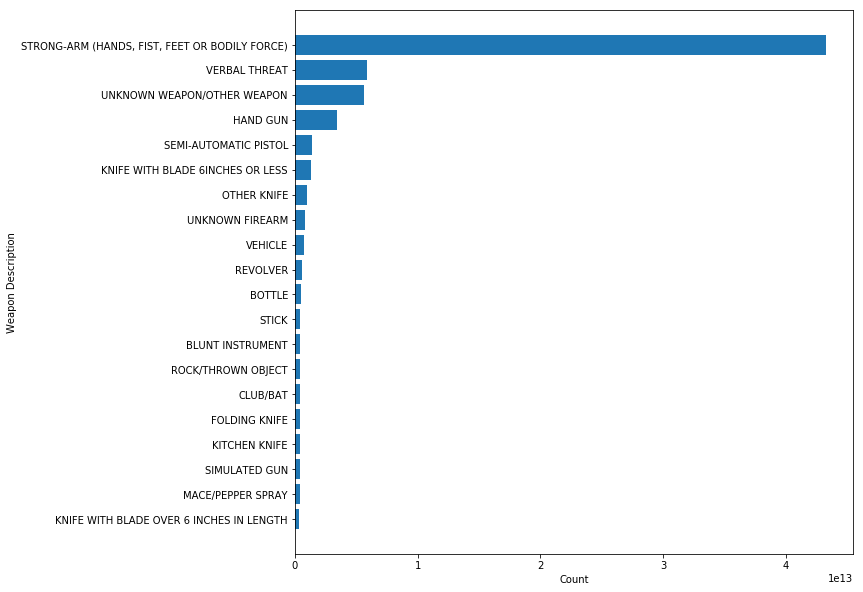

In [5]:
crimes = data.groupby('Weapon Description').sum()[['DR Number']]
crimes.sort_values(by='DR Number', ascending=True, inplace=True)
crimes.reset_index(inplace=True)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.barh(crimes['Weapon Description'][-20:], width=crimes['DR Number'][-20:])
ax.set_xlabel('Count')
ax.set_ylabel('Weapon Description')
plt.show()

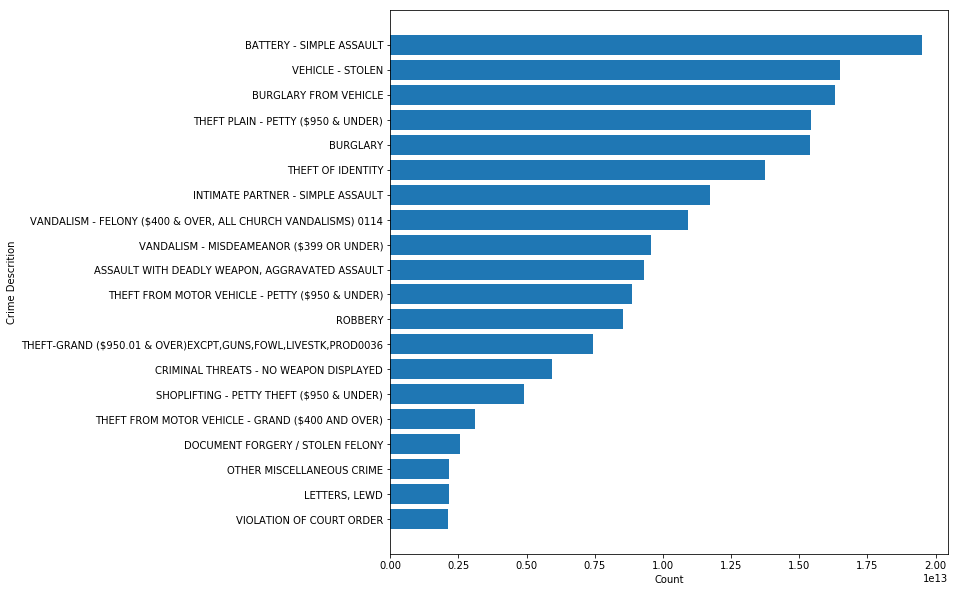

In [6]:
crimes = data.groupby('Crime Code Description').sum()[['DR Number']]
crimes.sort_values(by='DR Number', ascending=True, inplace=True)
crimes.reset_index(inplace=True)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.barh(crimes['Crime Code Description'][-20:], width=crimes['DR Number'][-20:])
ax.set_xlabel('Count')
ax.set_ylabel('Crime Descrition')
plt.show()

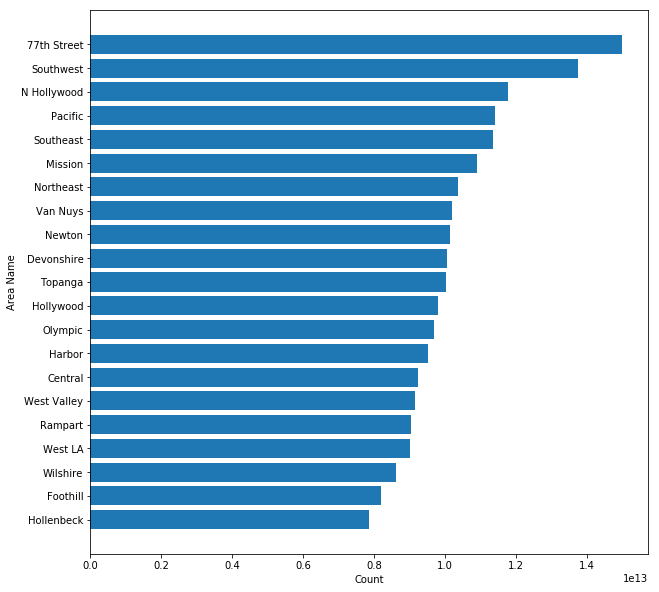

In [7]:
crimes = data.groupby('Area Name').sum()[['DR Number']]
crimes.sort_values(by='DR Number', ascending=True, inplace=True)
crimes.reset_index(inplace=True)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.barh(crimes['Area Name'], width=crimes['DR Number'])
ax.set_xlabel('Count')
ax.set_ylabel('Area Name')
plt.show()

In [8]:
'''area_list = [[1, 'Central'],
 [2, 'Rampart'],
 [3, 'Southwest'],
 [4, 'Hollenbeck'],
 [5, 'Harbor'],
 [6, 'Hollywood'],
 [7, 'Wilshire'],
 [8, 'West LA'],
 [9, 'Van Nuys'],
 [10, 'West Valley'],
 [11, 'Northeast'],
 [12, '77th Street'],
 [13, 'Newton'],
 [14, 'Pacific'],
 [15, 'N Hollywood'],
 [16, 'Foothill'],
 [17, 'Devonshire'],
 [18, 'Southeast'],
 [19, 'Mission'],
 [20, 'Olympic'],
 [21, 'Topanga']]'''


area_list = [
    [12, '77th Street'],
    [3, 'Southwest'],
#    [15, 'N Hollywood'],
#    [14, 'Pacific'],
#    [18, 'Southeast'],
]


In [3]:
BBox=((clean.Latitude.min(),clean.Latitude.max(),clean.Longitude.min(),clean.Longitude.max()))
BBox

(-118.8279, -117.6596, 33.3427, 34.7907)

In [4]:
la = plt.imread('data/map-2.png')

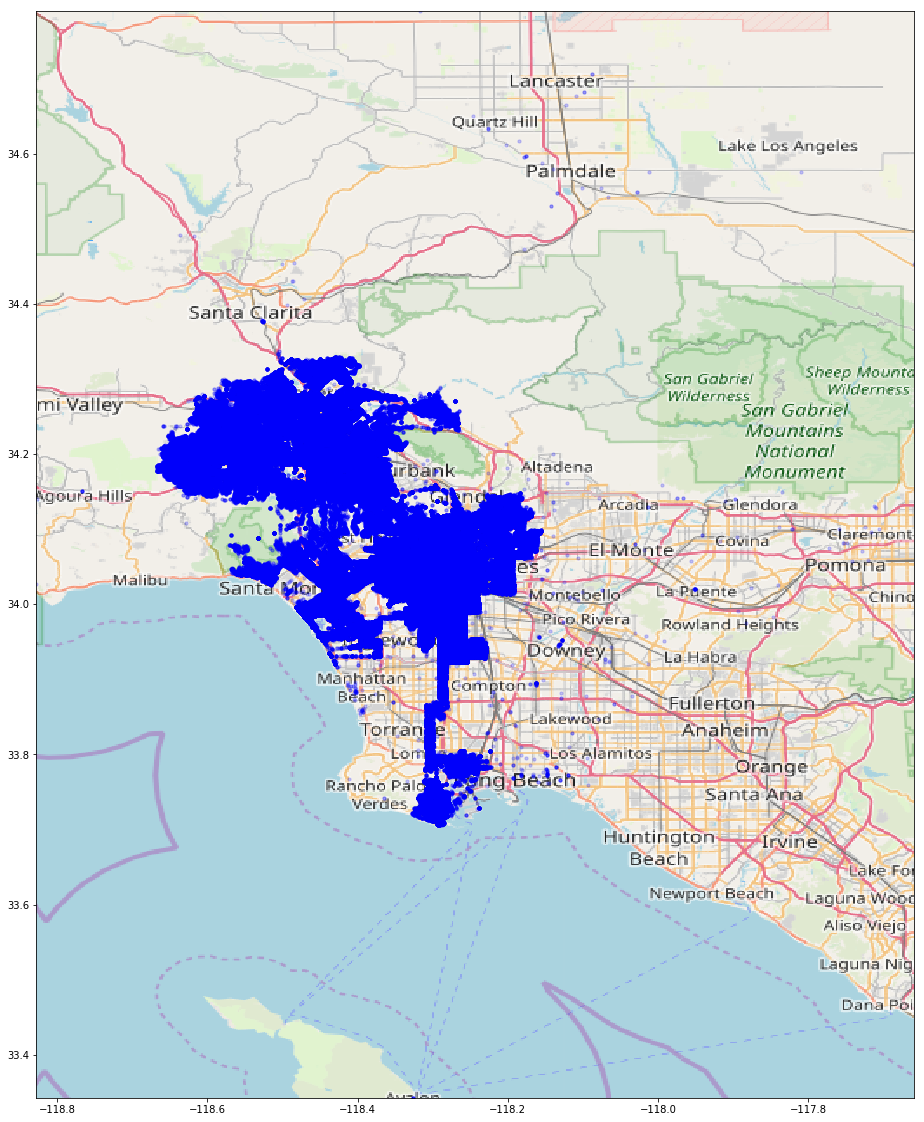

In [61]:
fig, ax = plt.subplots(figsize = (20,20))
ax.scatter(clean.Latitude, clean.Longitude, zorder=1, alpha= 0.2, c='b', s=10)
area = clean.loc[clean['Area ID'] == 6, ['Longitude', 'Latitude']]
ax.scatter(area['Longitude'], area['Latitude'], label='Hollywood', , zorder=1, alpha= 0.2, c='r', s=10)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(la, zorder=0, extent = BBox, aspect= 'equal')
plt.show()

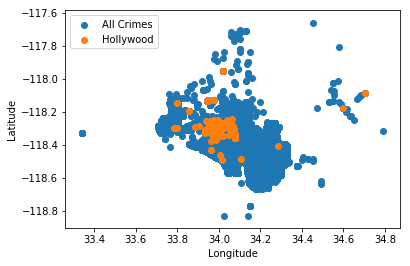

In [32]:
plt.scatter(clean['Longitude'], clean['Latitude'], label='All Crimes')
area = clean.loc[clean['Area ID'] == 12, ['Longitude', 'Latitude']]
plt.scatter(area['Longitude'], area['Latitude'], label='Hollywood')

plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

del area

# 3 Run K-means

In [5]:
#df = clean[['Time Occurred', 'Timestamp', 'Longitude', 'Latitude']]
df = clean[['Longitude', 'Latitude']]

In [ ]:
# Extra Code stuff
#clust1 = data[data['Cluster Label'] == 1].groupby('Victim Sex')['Time Occurred'].nunique()
#myKMeans.predict(data.iloc[:,:-1][data.index == 0])
#data.iloc[:,:-1][data.index == 0]

In [6]:
myKMeans = KMeans(n_clusters=5)

myKMeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
myKMeans.inertia_

6096.036454454316

In [33]:
# Find lowest value for k that minimizes the inertia
inertia = []

for i in range(2, 20):
    myKMeans = KMeans(n_clusters=i)
    myKMeans.fit(df)
    inertia.append(myKMeans.inertia_)
    print(i, "Inertia:", myKMeans.inertia_)

2 Inertia: 15837.465869007112
3 Inertia: 11253.380799893228
4 Inertia: 8413.321169883513
5 Inertia: 6095.996690773212
6 Inertia: 4570.7913100845835
7 Inertia: 3723.342166637436
8 Inertia: 3157.466484394023
9 Inertia: 2853.8705215178547
10 Inertia: 2566.252219478181
11 Inertia: 2316.8194616460746
12 Inertia: 2143.8118590702215
13 Inertia: 1976.8688559140817
14 Inertia: 1808.264609530487
15 Inertia: 1665.1836547924543
16 Inertia: 1556.1080186541776
17 Inertia: 1475.4307355383276
18 Inertia: 1381.4909237092693
19 Inertia: 1297.5117887194342


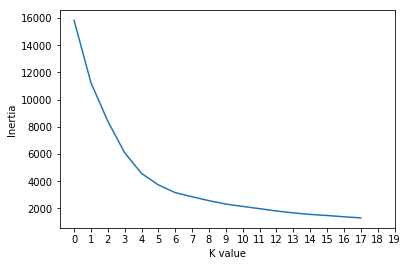

In [35]:
plt.plot(inertia)
plt.xticks(range(0, 20))
plt.xlabel('K value')
plt.ylabel('Inertia')
plt.show()

In [8]:
centers = myKMeans.cluster_centers_
centers

array([[  34.02977332, -118.27035175],
       [  34.21256592, -118.42103837],
       [  34.03840164, -118.38868856],
       [  34.2101841 , -118.56138245],
       [  33.77394293, -118.28609666]])

In [9]:
y_kmeans = myKMeans.predict(df)
y_kmeans
#del y_kmeans

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

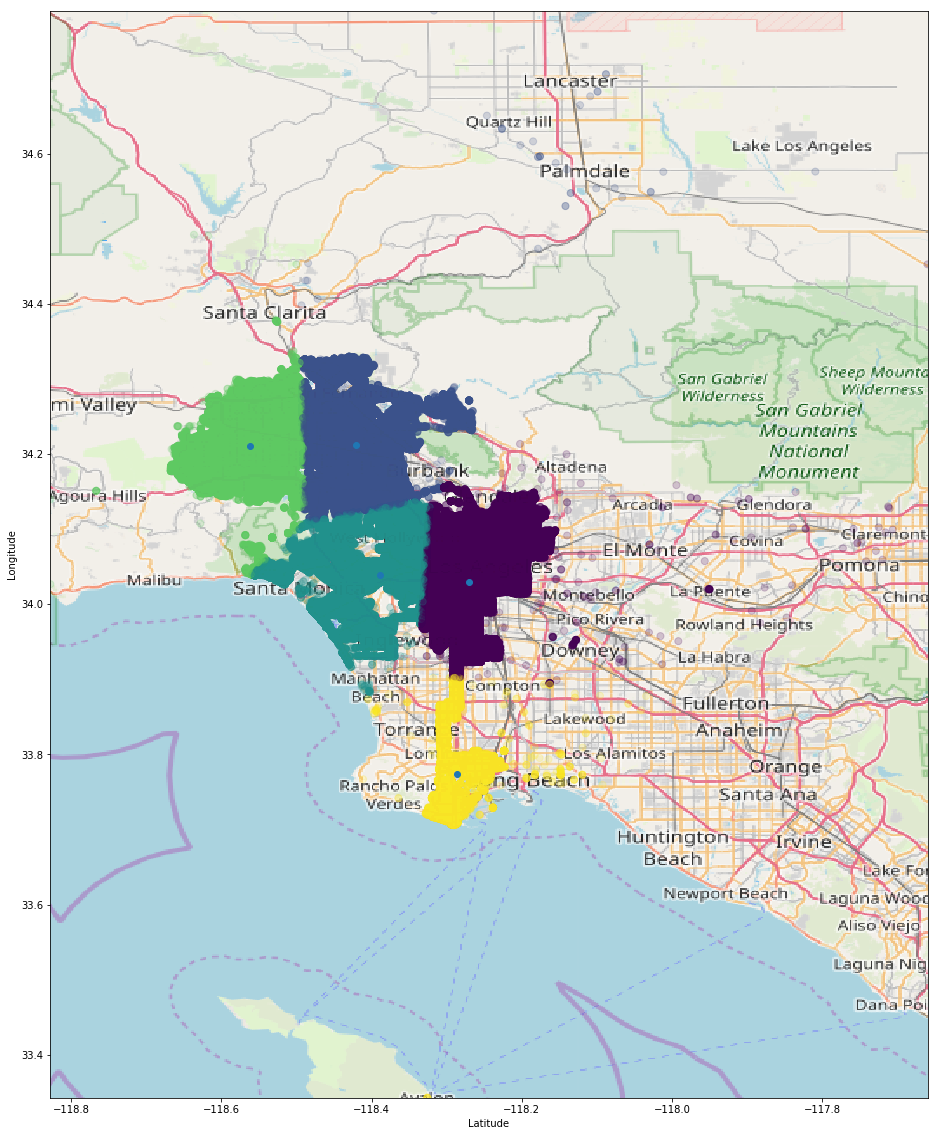

In [10]:
fig, ax = plt.subplots(figsize = (20,20))
ax.scatter(df.Latitude, df.Longitude, zorder=1, alpha= 0.2, c=y_kmeans, s=50, cmap='viridis')
ax.scatter(centers[:,1], centers[:,0], label='Centers')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.imshow(la, zorder=0, extent = BBox, aspect= 'equal')
plt.show()

In [36]:
labels = [[110, 'CRIMINAL HOMICIDE'],
 [113, 'MANSLAUGHTER, NEGLIGENT'],
 [121, 'RAPE, FORCIBLE'],
 [122, 'RAPE, ATTEMPTED'],
 [210, 'ROBBERY'],
 [220, 'ATTEMPTED ROBBERY'],
 [230, 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT'],
 [231, 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER'],
 [235, 'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT'],
 [236, 'INTIMATE PARTNER - AGGRAVATED ASSAULT'],
 [237, 'CHILD NEGLECT (SEE 300 W.I.C.)'],
 [250, 'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT'],
 [251, 'SHOTS FIRED AT INHABITED DWELLING'],
 [310, 'BURGLARY'],
 [320, 'BURGLARY, ATTEMPTED'],
 [330, 'BURGLARY FROM VEHICLE'],
 [331, 'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)'],
 [341, 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036'],
 [343, 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)'],
 [345, 'DISHONEST EMPLOYEE - GRAND THEFT'],
 [347, 'GRAND THEFT / INSURANCE FRAUD'],
 [349, 'GRAND THEFT / AUTO REPAIR'],
 [350, 'THEFT, PERSON'],
 [351, 'PURSE SNATCHING'],
 [352, 'PICKPOCKET'],
 [353, 'DRUNK ROLL'],
 [354, 'THEFT OF IDENTITY'],
 [410, 'BURGLARY FROM VEHICLE, ATTEMPTED'],
 [420, 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)'],
 [421, 'THEFT FROM MOTOR VEHICLE - ATTEMPT'],
 [432, 'BLOCKING DOOR INDUCTION CENTER'],
 [433, 'DRIVING WITHOUT OWNER CONSENT (DWOC)'],
 [434, 'FALSE IMPRISONMENT'],
 [435, 'LYNCHING'],
 [436, 'LYNCHING - ATTEMPTED'],
 [437, 'RESISTING ARREST'],
 [438, 'RECKLESS DRIVING'],
 [439, 'FALSE POLICE REPORT'],
 [440, 'THEFT PLAIN - PETTY ($950 & UNDER)'],
 [441, 'THEFT PLAIN - ATTEMPT'],
 [442, 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)'],
 [443, 'SHOPLIFTING - ATTEMPT'],
 [444, 'DISHONEST EMPLOYEE - PETTY THEFT'],
 [445, 'DISHONEST EMPLOYEE ATTEMPTED THEFT'],
 [446, 'PETTY THEFT - AUTO REPAIR'],
 [450, 'THEFT FROM PERSON - ATTEMPT'],
 [451, 'PURSE SNATCHING - ATTEMPT'],
 [452, 'PICKPOCKET, ATTEMPT'],
 [453, 'DRUNK ROLL - ATTEMPT'],
 [470, 'TILL TAP - GRAND THEFT ($950.01 & OVER)'],
 [471, 'TILL TAP - PETTY ($950 & UNDER)'],
 [472, 'TILL TAP - ATTEMPT'],
 [473, 'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)'],
 [474, 'THEFT, COIN MACHINE - PETTY ($950 & UNDER)'],
 [475, 'THEFT, COIN MACHINE - ATTEMPT'],
 [480, 'BIKE - STOLEN'],
 [485, 'BIKE - ATTEMPTED STOLEN'],
 [487, 'BOAT - STOLEN'],
 [510, 'VEHICLE - STOLEN'],
 [520, 'VEHICLE - ATTEMPT STOLEN'],
 [622, 'BATTERY ON A FIREFIGHTER'],
 [623, 'BATTERY POLICE (SIMPLE)'],
 [624, 'BATTERY - SIMPLE ASSAULT'],
 [625, 'OTHER ASSAULT'],
 [626, 'INTIMATE PARTNER - SIMPLE ASSAULT'],
 [627, 'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT'],
 [647, 'THROWING OBJECT AT MOVING VEHICLE'],
 [648, 'ARSON'],
 [649, 'DOCUMENT FORGERY / STOLEN FELONY'],
 [651, 'DOCUMENT WORTHLESS ($200.01 & OVER)'],
 [652, 'DOCUMENT WORTHLESS ($200 & UNDER)'],
 [653, 'CREDIT CARDS, FRAUD USE ($950.01 & OVER)'],
 [654, 'CREDIT CARDS, FRAUD USE ($950 & UNDER'],
 [660, 'COUNTERFEIT'],
 [661, 'UNAUTHORIZED COMPUTER ACCESS'],
 [662, 'BUNCO, GRAND THEFT'],
 [664, 'BUNCO, PETTY THEFT'],
 [666, 'BUNCO, ATTEMPT'],
 [668, 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)'],
 [670, 'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)'],
 [740, 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114'],
 [745, 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)'],
 [753, 'DISCHARGE FIREARMS/SHOTS FIRED'],
 [755, 'BOMB SCARE'],
 [756, 'WEAPONS POSSESSION/BOMBING'],
 [761, 'BRANDISH WEAPON'],
 [762, 'LEWD CONDUCT'],
 [763, 'STALKING'],
 [805, 'PIMPING'],
 [806, 'PANDERING'],
 [810, 'SEX, UNLAWFUL'],
 [812, 'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)0060'],
 [813, 'CHILD ANNOYING (17YRS & UNDER)'],
 [815, 'SEXUAL PENTRATION WITH A FOREIGN OBJECT'],
 [820, 'ORAL COPULATION'],
 [821, 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH 0007=02'],
 [830, 'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)'],
 [840, 'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM0065'],
 [850, 'INDECENT EXPOSURE'],
 [860, 'BATTERY WITH SEXUAL CONTACT'],
 [865, 'DRUGS, TO A MINOR'],
 [870, 'CHILD ABANDONMENT'],
 [880, 'DISRUPT SCHOOL'],
 [882, 'INCITING A RIOT'],
 [884, 'FAILURE TO DISPERSE'],
 [886, 'DISTURBING THE PEACE'],
 [888, 'TRESPASSING'],
 [890, 'FAILURE TO YIELD'],
 [900, 'VIOLATION OF COURT ORDER'],
 [901, 'VIOLATION OF RESTRAINING ORDER'],
 [902, 'VIOLATION OF TEMPORARY RESTRAINING ORDER'],
 [903, 'CONTEMPT OF COURT'],
 [910, 'KIDNAPPING'],
 [920, 'KIDNAPPING - GRAND ATTEMPT'],
 [922, 'CHILD STEALING'],
 [924, 'TELEPHONE PROPERTY - DAMAGE'],
 [926, 'TRAIN WRECKING'],
 [928, 'THREATENING PHONE CALLS/LETTERS'],
 [930, 'CRIMINAL THREATS - NO WEAPON DISPLAYED'],
 [931, 'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)0132'],
 [932, 'PEEPING TOM'],
 [933, 'PROWLER'],
 [940, 'EXTORTION'],
 [942, 'BRIBERY'],
 [943, 'CRUELTY TO ANIMALS'],
 [944, 'CONSPIRACY'],
 [946, 'OTHER MISCELLANEOUS CRIME'],
 [948, 'BIGAMY'],
 [949, 'ILLEGAL DUMPING'],
 [950, 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400'],
 [951, 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER'],
 [952, 'ABORTION/ILLEGAL'],
 [954, 'CONTRIBUTING'],
 [956, 'LETTERS, LEWD']]

In [37]:
labels2 = []
for i in labels:
    labels2.append(i[1])

In [38]:
def compute_purity(df, labels, colName):
    totPurity = 0

    print('Purity of each label:')
    for i in range(5):
        a = df[df['K-Means Label'] == i]

        # find the grade that appears the most
        g = []
        for l in labels:
            g.append(len(a[a[colName] == l]))
            #print(l, len(a[a[colName] == l]))

        # compute purity
        purity = max(g) / len(a)
        print('\tCluster', i, ': ' , purity, '\tlabel:', labels[g.index(max(g))])
        totPurity += len(a) / len(df) * purity

    print('Overall Purity:', totPurity)

data['K-Means Label'] = y_kmeans
compute_purity(data, labels2, 'Crime Code Description')

Purity of each label:
	Cluster 0 :  0.09203921867123557 	label: BATTERY - SIMPLE ASSAULT
	Cluster 1 :  0.09176879282061179 	label: BATTERY - SIMPLE ASSAULT
	Cluster 2 :  0.09237120034310835 	label: BATTERY - SIMPLE ASSAULT
	Cluster 3 :  0.09159014016433059 	label: BATTERY - SIMPLE ASSAULT
	Cluster 4 :  0.09234978598905565 	label: BATTERY - SIMPLE ASSAULT
Overall Purity: 0.09200626642664719


In [50]:
labels = [[1, 'Central'],
 [2, 'Rampart'],
 [3, 'Southwest'],
 [4, 'Hollenbeck'],
 [5, 'Harbor'],
 [6, 'Hollywood'],
 [7, 'Wilshire'],
 [8, 'West LA'],
 [9, 'Van Nuys'],
 [10, 'West Valley'],
 [11, 'Northeast'],
 [12, '77th Street'],
 [13, 'Newton'],
 [14, 'Pacific'],
 [15, 'N Hollywood'],
 [16, 'Foothill'],
 [17, 'Devonshire'],
 [18, 'Southeast'],
 [19, 'Mission'],
 [20, 'Olympic'],
 [21, 'Topanga']]

labels2 = []
for i in labels:
    labels2.append(i[1])

In [51]:
compute_purity(data, labels2, 'Area Name')

Purity of each label:
	Cluster 0 :  0.0696379870199813 	label: 77th Street
	Cluster 1 :  0.0694250326066994 	label: 77th Street
	Cluster 2 :  0.07003565110169946 	label: 77th Street
	Cluster 3 :  0.07020556749586089 	label: 77th Street
	Cluster 4 :  0.0712060464864279 	label: 77th Street
Overall Purity: 0.06981246165537683


In [27]:
labels = [
 [1, 'A', 'Other Asian'],
 [2, 'B', 'Black'],
 [3, 'C', 'Chinese'],
 [4, 'D', 'Cambodian'],
 [5, 'F', 'Filipino'],
 [6, 'G', 'Guamanian'],
 [7, 'H', 'Hispanic/Latin/Mexican'],
 [8, 'I', 'American Indian/Alaskan Native'],
 [9, 'J', 'Japanese'],
 [10, 'K', 'Korean'],
 [11, 'L', 'Laotian '],
 [12, 'O', 'Other'],
 [13, 'P', 'Pacific Islander'],
 [14, 'S', 'Samoan'],
 [15, 'U', 'Hawaiian'],
 [16, 'V', 'Vietnamese'],
 [17, 'W', 'White'],
 [18, 'X', 'Unknown'],
 [19, 'Z', 'AsianIndian']]

labels2 = []
for i in labels:
    labels2.append(i[1])

In [28]:
compute_purity(data, labels2, 'Victim Descent')

Purity of each label:
	Cluster 0 :  0.3465010103389195 	label: H
	Cluster 1 :  0.34710648616510975 	label: H
	Cluster 2 :  0.34712244679140086 	label: H
	Cluster 3 :  0.34772682866633076 	label: H
	Cluster 4 :  0.34554640515793467 	label: H
Overall Purity: 0.34684684116047554


In [24]:
labels2

[None,
 'Other Asian',
 'Black',
 'Chinese',
 'Cambodian',
 'Filipino',
 'Guamanian',
 'Hispanic/Latin/Mexican',
 'American Indian/Alaskan Native',
 'Japanese',
 'Korean',
 'Laotian ',
 'Other',
 'Pacific Islander',
 'Samoan',
 'Hawaiian',
 'Vietnamese',
 'White',
 'Unknown',
 'AsianIndian']

In [48]:
labels2 = ['M', 'F']
compute_purity(data, labels2, 'Victim Sex')

Purity of each label:
	Cluster 0 :  0.4667421129655135 	label: M
	Cluster 1 :  0.46803298334957183 	label: M
	Cluster 2 :  0.46542111188548757 	label: M
	Cluster 3 :  0.4677251833036825 	label: M
	Cluster 4 :  0.46541962399089776 	label: M
Overall Purity: 0.46681406992039465


# Trying to cluster based on demographics

In [42]:
clean.loc[clean['Victim Descent'].isna(), ['Victim Descent']] = 0
clean.loc[clean['Victim Sex'].isna(), ['Victim Sex']] = 2
clean.loc[clean['Victim Age'].isna(), ['Victim Age']] = 40

In [43]:
myKMeans = KMeans(n_clusters=5)

'''myKMeans.fit(data[['Month', 'Day', 'Year', 'Time Occurred',
       'Area ID', 'Reporting District', 'Victim Age',
       'Victim Sex', 'Victim Descent', 'Premise Code',
       'Longitude', 'Latitude']]'''

myKMeans.fit(clean[['Victim Age', 'Victim Sex', 'Victim Descent']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
#predicted_labels = myKMeans.predict(X_test[['Victim Age', 'Victim Sex', 'Victim Descent']])

In [44]:
# Predict cluster based on Demographics
#myDemo = [[3, 11, 2013, 1800, 12, 1241, 26, 0, 17, 502.0, 33.9829, -118.3338]]
myDemo = [[26, 0, 17]]
myLabel = myKMeans.predict(myDemo)

In [45]:
data['Cluster Label'] = myKMeans.labels_

In [46]:
# myDemo cluster means
for i in data.columns:
    clust = data[data['Cluster Label'] == myLabel[0]].groupby(i)['Time Occurred'].nunique()
    m = clust.idxmax()
    #m = clust.index(clust.mean())
    #display(clust)
    #print(m)
    #break
    print(i, m)

DR Number 214
Date Reported 10/24/2016
Date Occurred 11/01/2016
Time Occurred 1
Area ID 14
Area Name Pacific
Reporting District 363
Crime Code 440
Crime Code Description THEFT PLAIN - PETTY ($950 & UNDER)
MO Codes 0344
Victim Age 15.0
Victim Sex M
Victim Descent H
Premise Code 501.0
Premise Description SINGLE FAMILY DWELLING
Weapon Used Code 400.0
Weapon Description STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
Status Code IC
Status Description Invest Cont
Crime Code 1 440.0
Crime Code 2 998.0
Crime Code 3 998.0
Crime Code 4 998.0
Address 6TH                          ST
Cross Street BROADWAY
Location  (0, 0)
K-Means Label 2
Cluster Label 0


In [47]:
myKMeans.inertia_

75574706.93764485

In [ ]:
# Find lowest value for k that minimizes the inertia
inertia = []

for i in range(2, 20):
    myKMeans = KMeans(n_clusters=i)
    myKMeans.fit(data[['Victim Age', 'Victim Sex', 'Victim Descent']])
    inertia.append(myKMeans.inertia_)
    print(i, "Inertia:", myKMeans.inertia_)

In [ ]:
plt.plot(inertia)
plt.xticks(range(0, 20))
plt.show()